In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install graphviz

In [16]:
def f(x):
    return 3*x**2 - 4*x +5

In [17]:
f(5)

60

In [18]:
xs = np.arange(-5,5,0.5)
ys = f(xs)

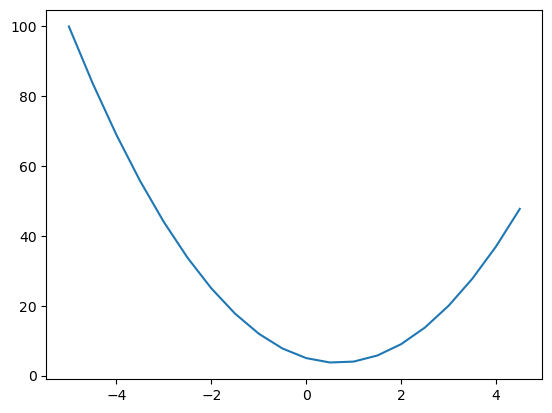

In [19]:
plt.plot(xs,ys)

In [20]:
h = 0.0001
x = 3.0
(f(x+h)-f(x))/h

14.000300000063248

In [21]:
#more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


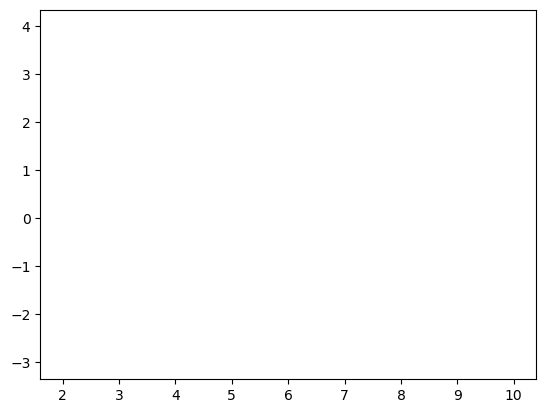

In [23]:
plt.plot(a,b,c,d)

In [24]:
h = 0.001
#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a+=h

d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope w respect to a', (d2-d1)/h)
#since d2 is lower (and the slope w respect to a is negative) we know now that slightly increasing a makes d smaller


d1 4.0
d2 3.997
slope w respect to a -3.0000000000001137


In [60]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label= label
                 
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a=Value(2.0, label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e=a*b; e.label= 'e'
d=e+c; d.label= 'd'
f=Value(-2.0, label='f')
L=d*f; L.label='L'
L

#same as  print((a.__mul__(b)).__add__(c))

Value(data=-8.0)

In [61]:
print(L, L._prev, L._op)

Value(data=-8.0) {Value(data=4.0), Value(data=-2.0)} *


In [57]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


#we're going to be calculating the derivative of the output/loss function with respect to each of the weights (the grads)
#we won't be doing it with respect to the input data bc it's fixed.
#gradient of 0 means no affect on output. assume this at initialization. 

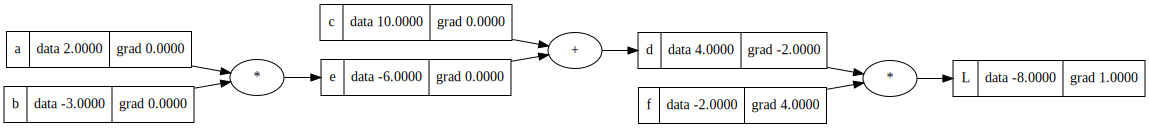

In [78]:
draw_dot(L)

In [ ]:
'''
L = d * f
dL/dd = f

(f(x+h)-f(x))/h

((d+h)*f - d*f)/h)
(d*f + h*f -d*f)/h
hf/h
f
'''

In [77]:
L.grad=1.0
f.grad = 4
d.grad = -2

In [79]:
#making a gating function so as to not mess up scope. these vars will all by local to the function.
def lol():
    h = 0.0001
    
    a=Value(2.0, label='a')
    b=Value(-3.0, label='b')
    c=Value(10.0, label='c')
    e=a*b; e.label= 'e'
    d=e+c; d.label= 'd'
    f=Value(-2.0, label='f')
    L=d*f; L.label='L'
    L1=L.data
    
    a=Value(2.0, label='a')
    b=Value(-3.0, label='b')
    c=Value(10.0, label='c')
    e=a*b; e.label= 'e'
    d=e+c; d.label= 'd'
    f=Value(-2.0 +h, label='f')
    L=d*f; L.label='L'
    L2 = L.data
    
    print((L2-L1)/h)
lol()

#calculating derivative of L with respect to h


3.9999999999995595
